## 06 - Tracking a Real Portfolio

In this notebook, I will leverage the functions and tools developed in the preceding chapters and consolidated within the `utils.py` file to monitor the evolution and performance of my real investment portfolio.

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# import the function apply_plot_config() for plot default configuration
from utils import apply_plot_config 
# Apply the default configuration for plots
apply_plot_config()

#### A. Description of assets included in my portfolio.

My portfolio comprises four distinct assets.
- `ITPS` seeks to track the *Bloomberg US Government Inflation-Linked Bond* index. This index tracks US Treasury Inflation-Protected Securities (TIPS). The ETF replicates the performance of the underlying index by **sampling** technique (buying a selection of the most relevant index constituents). The interest income (coupons) in the ETF is accumulated and reinvested in the ETF. TER (*Total Expense Ratio*) 0.10%.
- `EM710` seeks to track the *Bloomberg Euro Treasury 50bn 7-10 Year Bond* index. This index tracks Euro denominated government bonds issued by members of the eurozone. Time to maturity: 7-10 years. Rating: Investment Grade. The ETF replicates the performance of the underlying index by **full replication** (buying all the index constituents). The interest income (coupons) in the ETF is accumulated and reinvested in the ETF. TER 0.15%.
- `CSSPX` seeks to track the *S&P 500®* index. This index tracks the 500 largest US stocks. The ETF replicates the performance of the underlying index by **full replication**. The dividends in the ETF are accumulated and reinvested in the ETF. TER 0.07%.
- `PHAU` is an ETC (*Exchange Traded Commodities*) that replicates the performance of the underlying index with a collateralised debt obligation which is **backed by physical holdings** of the precious metal. TER 0.39%. ETCs allow compensating losses from other assets before taxation on gains. This does not apply to ETFs.

My initial investment strategy, implemented in **February 2023**, involved an equal allocation of capital across these four assets. My rebalancing strategy was set for an annual frequency. However, following a review of backtesting results for various weighting combinations, I decided in **February 2025** to adjust the target asset allocation, increasing the weight of `CSSPX` to 34% and reducing the target weight of the other three assets (`ITPS`, `EM710`, `PHAU`) to 22% each.

#### B. Reading all transactions (BUY/SELL/Dividends) per each Asset over time from `.csv`

#### B. Reading All Transactions (BUY/SELL) per Each Asset Over Time from `.xlsx`

In this section, I load all historical transactions related to the assets in my portfolio from an Excel file (`transactions_carlo.xlsx`). This data includes buy and sell orders, needed for tracking the quantity of each asset held and the capital invested over time. I utilize the `load_transactions()` function from the `utils.py` module to perform this task.

In [2]:
# importing the necessary functions from utils
from utils import load_transactions, portfolio_cash_flows
# Loading the Portfolio Transactions
excel_path = '../data/transactions_carlo.xlsx'
transacts = load_transactions(excel_path=excel_path, sheet_name=0)
transacts.head(2)

,Ticker,Type,Shares,Amount,Commissions,Taxes
Date,,,,,,
2023-02-15,CSSPX,BUY,63,25144.72,8.0,0.0
2023-02-15,EM710,BUY,162,25092.49,8.0,0.0


The first few rows of the loaded transactions DataFrame are displayed above, providing a glimpse into the structure of the data.

Next, I use the `portfolio_cash_flows()` function from `utils.py` to summarize the overall cash inflows (from purchases, commissions, and taxes) and outflows (from sales and dividends) related to the portfolio transactions. This provides a high-level overview of the capital movements within the portfolio.

In [3]:
print('Portfolio Cash Flow Summary:\n')
portfolio_cash_flows(transactions=transacts)

Portfolio Cash Flow Summary:



Date
2023-02-15    100135.42
2024-02-27     14531.55
2025-02-14      2278.61
Name: Cash_Flows, dtype: float64

#### C. Portfolio accounting, summary, asset allocation, and rebalance instructions when needed

#### C. Portfolio Accounting, Summary, Asset Allocation, and Rebalance Instructions

In this section, I perform an analysis of the portfolio's current state. I begin by calculating the profit and loss (P/L) for each asset based on the specified reference price (`close`). The `portfolio_pl()` function from `utils.py` is used for this calculation.

In [4]:
# importing the necessary functions from utils
from utils import portfolio_pl, portfolio_summary, compare_asset_allocation, calculate_rebalance

In [5]:
price_ref='close'
df_pl = portfolio_pl(transactions=transacts, price_ref=price_ref)
print(f'Portfolio Current P/L by Ticker at {price_ref} price as of {df_pl.Last_Date.unique()[0]}:\n')
df_pl.round(2)

Portfolio Current P/L by Ticker at close price as of 2025-05-16:



,Current_Shares,Subscriptions,Redemptions,Dividends,Costs,Last_Price,Last_Date,Market_Value,Total Return (%)
CSSPX,84,38147.08,0.00,0.0,26.00,566.11,2025-05-16,47553.24,24.57
EM710,201,31435.81,0.00,0.0,25.18,168.01,2025-05-16,33770.01,7.34
ITPS,145,30898.87,0.00,0.0,19.36,221.12,2025-05-16,32062.40,3.70
PHAU,129,28636.15,12276.87,0.0,34.00,265.77,2025-05-16,34284.33,62.40


The output above shows the current profit or loss for each asset in the portfolio, calculated using the closing price as of the latest available date. This provides a snapshot of the individual performance of each holding.

Next, I generate a portfolio summary using the `portfolio_summary()` function from `utils.py`. This summary provides key metrics for the overall portfolio, such as the total market value, total cost basis, and the overall profit or loss.

In [6]:
price_ref='close'
df_summary = portfolio_summary(transactions=transacts, price_ref=price_ref)

print(f'Portfolio Summary at {price_ref} price as of {df_pl.Last_Date.unique()[0]}:\n')
df_summary.round(2)

Portfolio Summary at close price as of 2025-05-16:



Subscriptions       129117.91
Redemptions          12276.87
Dividends                0.00
Costs                  104.54
Market_Value        147669.98
Profit (Loss)        30724.40
Total Return (%)        23.78
dtype: float64

Following the portfolio summary, I analyze the current asset allocation and compare it against the target strategic allocation defined. The `compare_asset_allocation()` function visualizes this comparison.

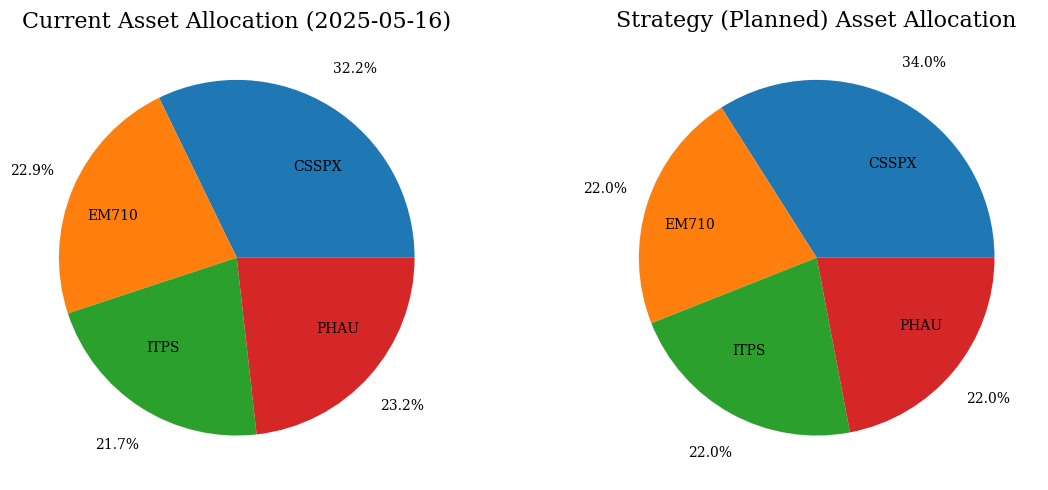

In [7]:
# current Market_Value per asset
current_allocation = df_pl['Market_Value']

# strategy asset allocation
strategy_percentages = [34,22,22,22]

# Current Asset Allocation vs. Strategy Asset Allocation
compare_asset_allocation(current_allocation = current_allocation,
                         strategy_percentages = strategy_percentages,
                         strategy_labels= current_allocation.index,
                         title_date = df_pl['Last_Date'].iloc[0])

The pie charts generated above visually represent the current asset allocation of the portfolio and the target strategic asset allocation. This allows for a quick assessment of any deviations from the intended strategy.

Finally, I calculate the necessary trades to rebalance the portfolio back to the target asset allocation using the `calculate_rebalance()` function. I assume no additional investment (`add_investment = 0`) for this rebalancing calculation.

In [8]:
# calculating shares to trade when rebalance is required
add_investment = 0 # additional money to invest

print('Rebalance Instructions (Shares to Trade) when rebalance is required:\n')
calculate_rebalance(current_portfolio_data=df_pl,
                    strategy_percentages=strategy_percentages,
                    amount_invest=add_investment)

Rebalance Instructions (Shares to Trade) when rebalance is required:



,Current_Shares,Target_Shares,Shares_To_Trade
CSSPX,84,88,4
EM710,201,193,-8
ITPS,145,146,1
PHAU,129,122,-7


#### D. Portfolio Total Return, Annual Return, Annual Volatility, Sharpe Ratio

In this section, I calculate key performance metrics for the overall portfolio over time. I begin by constructing a portfolio-level time series using the `build_portfolio_timeseries()` function from `utils.py`. This function aggregates the individual asset holdings and their market values over the period covered by the transaction data. It also utilizes the `get_ticker_timeseries()` function (also from `utils.py`) to fetch historical price data for each asset.

In [9]:
# importing the necessary functions from utils
from utils import build_portfolio_timeseries, get_ticker_timeseries

In [10]:
portfolio_df = build_portfolio_timeseries(transactions=transacts, 
                                          get_ticker_timeseries=get_ticker_timeseries)
portfolio_df.head(2)

,Net_Costs,Tot_Costs,Income,Market_Value,Revenue
Date,,,,,
2023-02-15,100135.42,100135.42,100196.958725,100196.958725,61.538725
2023-02-16,100135.42,100135.42,100226.040298,100226.040298,90.620298


From the first few rows displayed above show that the `portfolio_df` DataFrame contains daily information about the portfolio, including the market value of each asset, total costs, income, and net costs, which will be used to calculate performance metrics.

Next, I calculate two indicators: the Total Return Index (TRI) and the Adjusted Investment Return Index (AIRI).

-   **Total Return Index (TRI)** → Captures all cash effects, including divestments and distributions.
-   **Adjusted Investment Return Index (AIRI)** → Focuses only on capital currently invested, excluding what has already been recovered.

In [11]:
# Creating tri pd.Series from portfolio_df DataFrame
tri = portfolio_df.Income/portfolio_df.Tot_Costs
tri.name = 'TRI'

# Creating aire pd.Series from portfolio_df DataFrame
airi = portfolio_df.Market_Value/portfolio_df.Net_Costs
airi.name = 'AIRI'

In [12]:
# taking most recent aire value as Total Return
tot_ret = tri.iloc[-1] - 1
# calculate nr of years of the portfolio serie
pf_years = (tri.index[-1] - tri.index[0])/pd.to_timedelta('365.25D') # length in years
# calculate annualized return
ann_ret = ((1 + tot_ret)**(1/pf_years))-1 # calculate annual return
# Calculate annualized volatility
ann_vol = np.std(tri.pct_change().dropna())*np.sqrt(252)
# Calculate Sharpe Ratio
sharpe = ann_ret/ann_vol

print('Total Return:', round(tot_ret*100, 2), '\nAnnualized Return:', round(ann_ret*100, 2), 
      '\nAnnualized Volatility:', round(ann_vol*100, 2), '\nSharpe Ratio:', round(sharpe, 2))

print('As of latest market data:', tri.index[-1].strftime('%Y-%m-%d'))

Total Return: 23.78 
Annualized Return: 9.95 
Annualized Volatility: 7.39 
Sharpe Ratio: 1.35
As of latest market data: 2025-05-16


The output above presents the calculated performance metrics for the portfolio:

-   **Total Return:** Calculated using the Total Return Index (TRI), representing the cumulative return on the cumulative capital invested.
-   **Annualized Return:** The average annual return of the portfolio over the investment period.
-   **Annualized Volatility:** Annualized based on daily percentage changes of the Total Return Index (TRI).
-   **Sharpe Ratio:** A risk-adjusted performance metric, calculated using the annualized return divided by the annualized volatility.

#### E. Visualizing Portfolio Metrics Over Time

In this section, I visualize some portfolio metrics over the investment period to gain insights into its performance and risk characteristics. I utilize the `plot_timeseries()` function from `utils.py` for this purpose.

First, I plot the portfolio's market value against the net capital invested over time. This helps to visualize the growth of the portfolio relative to the net capital invested.

In [13]:
# importing the necessary functions from utils
from utils import plot_timeseries, drawdown_metrics, monthly_profit_loss

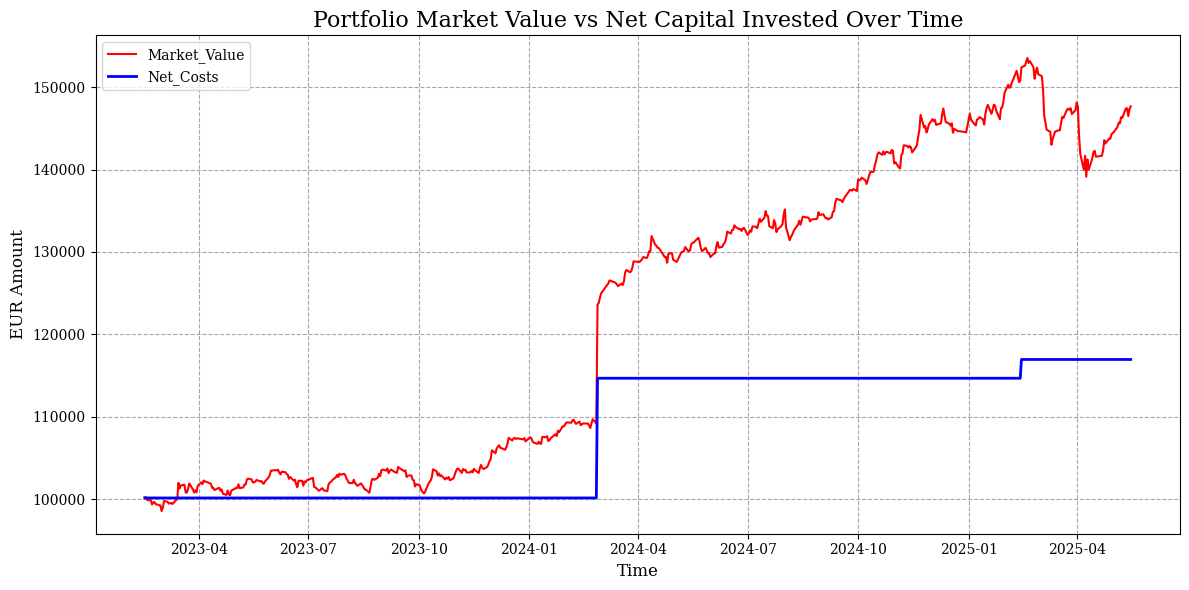

In [14]:
plot_timeseries(
    time_series_data=portfolio_df,
    columns_to_plot=['Market_Value', 'Net_Costs'],
    title='Portfolio Market Value vs Net Capital Invested Over Time',
    ylabel='EUR Amount',
    xlabel='Time',
    legend_loc='upper left',
    column_styles={
        'Market_Value': {'color': 'red'},
        'Net_Costs': {'color': 'blue','linewidth': 2}
    }
)

The chart above shows the evolution of the portfolio's market value (in red) compared to the net capital invested (in blue) over time. The difference between these lines represents the evolution of profit or loss of the portfolio versus the net capital invested.

Next, I visualize the portfolio's revenue (profit/loss) over time.

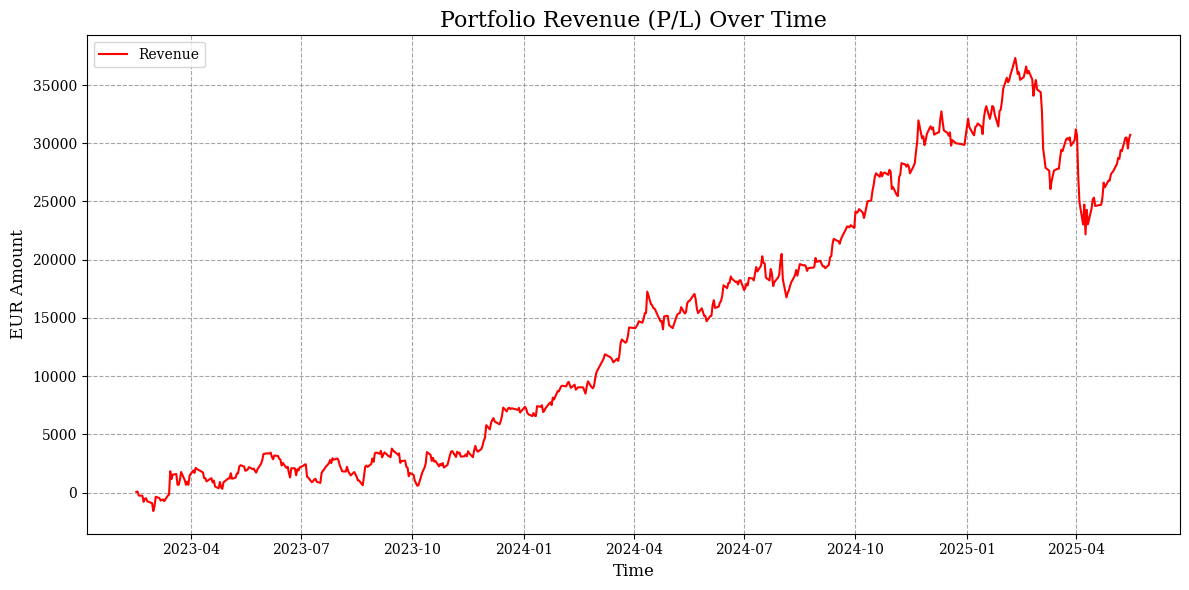

In [15]:
plot_timeseries(
    time_series_data=portfolio_df.Revenue,
    title='Portfolio Revenue (P/L) Over Time',
    ylabel='EUR Amount',
    xlabel='Time',
    legend_loc='upper left',
    grid=True,
    color='red',
    linewidth=1.5
)

The time series plot above illustrates the daily profit or loss of the portfolio. The printed statements provide key statistics about the portfolio's profitability, including the all-time highest profit, the date it occurred, the current profit, and the date of the latest data.

In [16]:
max_profits = round(portfolio_df.Revenue.max(),2)
date_max_profits = portfolio_df.Revenue.idxmax().strftime('%Y-%m-%d')
print('All time highest Portfolio Profits: ', max_profits)
print('Date of highest Portfolio Profits: ', date_max_profits)
print('Current Portfolio Profits: ', round(portfolio_df.Revenue.iloc[-1],2))
print('As of latest market data:', portfolio_df.Revenue.index[-1].strftime('%Y-%m-%d'))

All time highest Portfolio Profits:  37322.05
Date of highest Portfolio Profits:  2025-02-10
Current Portfolio Profits:  30724.4
As of latest market data: 2025-05-16


Following the profit visualization, I analyze the portfolio's *drawdowns*, which represent periods of peak-to-trough decline during a specific record period. I calculate both the daily drawdown and the **maximum daily drawdown** over a rolling 250-day window, using the Adjusted Investment Return Index (AIRI) as time series for this analysis.

In [17]:
# Calculating the rolling max of Portfolio Normalized Values using .rolling().max() over a 250 days window
roll_max = (airi).rolling(min_periods=1, window=250).max()

# Calculating the daily draw-down from rolling max
daily_drawdown = (airi)/roll_max - 1

# Calculating the rollling max daily draw-down over a 250 days window
max_daily_drawdown = daily_drawdown.rolling(min_periods=1, window=250).min()

# Creating the dataframe to visualize
df_drawdown = pd.DataFrame({
    'Drawdown': daily_drawdown,
    'Max_drawdown': max_daily_drawdown})

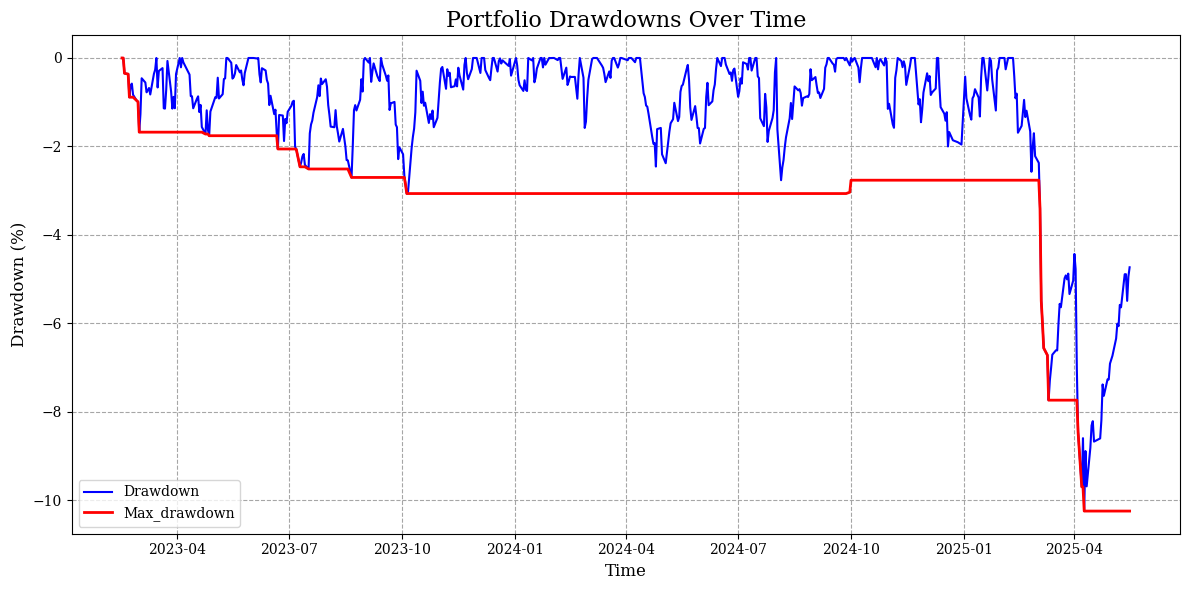

Max drawdown:  -10.25 %
Date of Max drawdown:  2025-04-09
Current drawdown: -4.73 % 
As of latest market data: 2025-05-16


In [18]:
# Using plot_timeseries() function to visualize drawdowns
plot_timeseries(
    time_series_data=df_drawdown*100,
    columns_to_plot=['Drawdown', 'Max_drawdown'],
    title='Portfolio Drawdowns Over Time',
    ylabel='Drawdown (%)',
    xlabel='Time',
    legend_loc='lower left',
    column_styles={
        'Drawdown': {'color': 'blue'},
        'Max_drawdown': {'color': 'red','linewidth': 2}}
    )

print("Max drawdown: ", round(df_drawdown.Drawdown.min()*100,2), "%")
print('Date of Max drawdown: ', df_drawdown.Drawdown.idxmin().strftime('%Y-%m-%d'))
print("Current drawdown:", round(df_drawdown.Drawdown.iloc[-1]*100,2),"%",
      '\nAs of latest market data:', df_drawdown.Drawdown.index[-1].strftime('%Y-%m-%d'))

The plot above visualizes the portfolio's drawdowns (in blue) and the maximum drawdown experienced up to each point in time (in red). The printed statements provide the maximum drawdown percentage, the date it occurred, the current drawdown, and the date of the latest data. 

Additionally, the top 5 highest drawdown periods, along with their duration and recovery times, are displayed:

In [19]:
drawdowns = drawdown_metrics(asset_values_ts=airi)

drawdowns['duration'] = drawdowns['valley'] - drawdowns['start']
drawdowns['recovery_time'] = drawdowns['end'] - drawdowns['valley']
drawdowns['total_lenght'] = drawdowns['end'] - drawdowns['start']

print('5 Highest Drawdowns:\n')
drawdowns.head()

5 Highest Drawdowns:



,drawdown,start,valley,end,duration,recovery_time,total_lenght
0,-0.102500,2025-02-11,2025-04-09,NaT,57 days,NaT,NaT
1,-0.030668,2023-09-15,2023-10-05,2023-11-22,20 days,48 days,68 days
2,-0.027647,2024-08-02,2024-08-05,2024-09-12,3 days,38 days,41 days
3,-0.027025,2023-06-07,2023-08-21,2023-09-01,75 days,11 days,86 days
4,-0.024561,2024-04-15,2024-04-25,2024-06-14,10 days,50 days,60 days


Finally, I analyze and visualize the **portfolio's monthly profit and loss** using the `monthly_profit_loss()` function from `utils.py`.

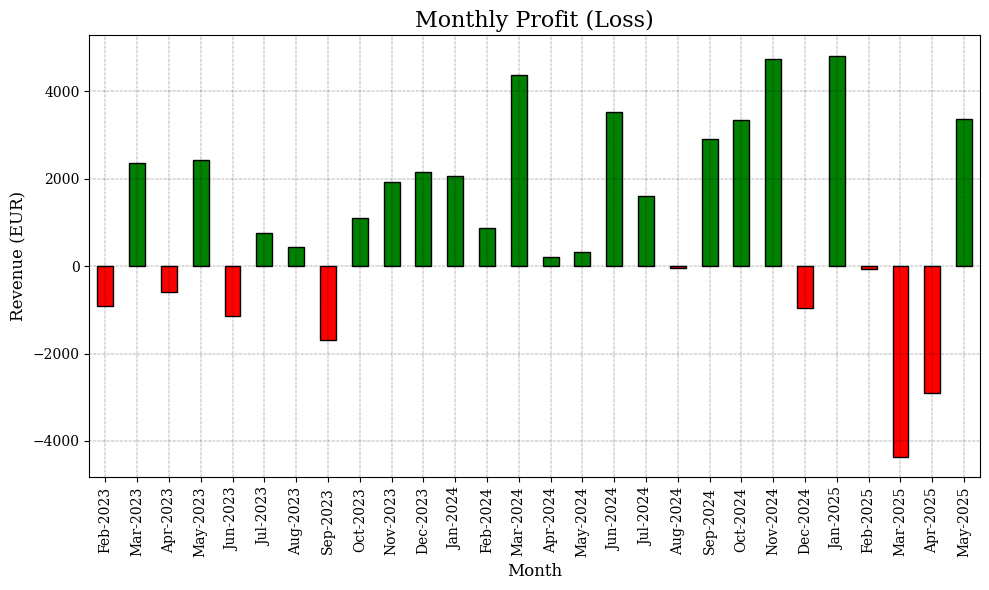

Total Current Portfolio Revenue: 30724.4
As of latest market data: 2025-05-16


In [20]:
# Calculating and visualizing Portfolio Monthly P/L
monthly_pl = monthly_profit_loss(portfolio_revenue_ts=portfolio_df, plot=True)

#### F. Individual Asset Performance

In this section, I go into the performance of each individual asset within the portfolio. I aim to understand how each component has contributed to the overall portfolio performance.

First, I calculate the fiscal price for each asset using the `calculate_fiscal_price()` function from `utils.py`. The fiscal price represents the average price paid for the shares of an asset, taking into account all buy transactions.

In [21]:
# importing the necessary functions from utils
from utils import calculate_fiscal_price

In [22]:
# Creating the dictionary with asset timeseries DataFrames
assets = {}
for asset in transacts['Ticker'].unique():
    assets[asset] = get_ticker_timeseries(transactions=transacts, ticker=asset)

In [23]:
fiscal_prices={}
for asset in assets.keys():
     fiscal_prices[asset] = calculate_fiscal_price(transactions=transacts,
                                                   assets=assets,
                                                   ticker=asset)

Next, I calculate the ratio of the current market price to the fiscal price for each asset over time. This ratio provides an indication of the return generated by each individual holding. A ratio above 1 indicates a profit, while a ratio below 1 indicates a loss.

In [24]:
# Create the DataFrame with the series of all assets Price to Fiscal-Price Ratios
price_to_fiscal_price_ratio = []
for asset in assets.keys():
    price_to_fiscal_price_ratio.append(assets[asset].Price/fiscal_prices[asset])
price_to_fiscal_price_ratio = pd.concat(price_to_fiscal_price_ratio,axis=1)
price_to_fiscal_price_ratio.columns = assets.keys()
price_to_fiscal_price_ratio.tail(2)

,CSSPX,EM710,ITPS,PHAU
Date,,,,
2025-05-15,1.236133,1.070518,1.031379,1.646843
2025-05-16,1.245727,1.073393,1.037006,1.632531


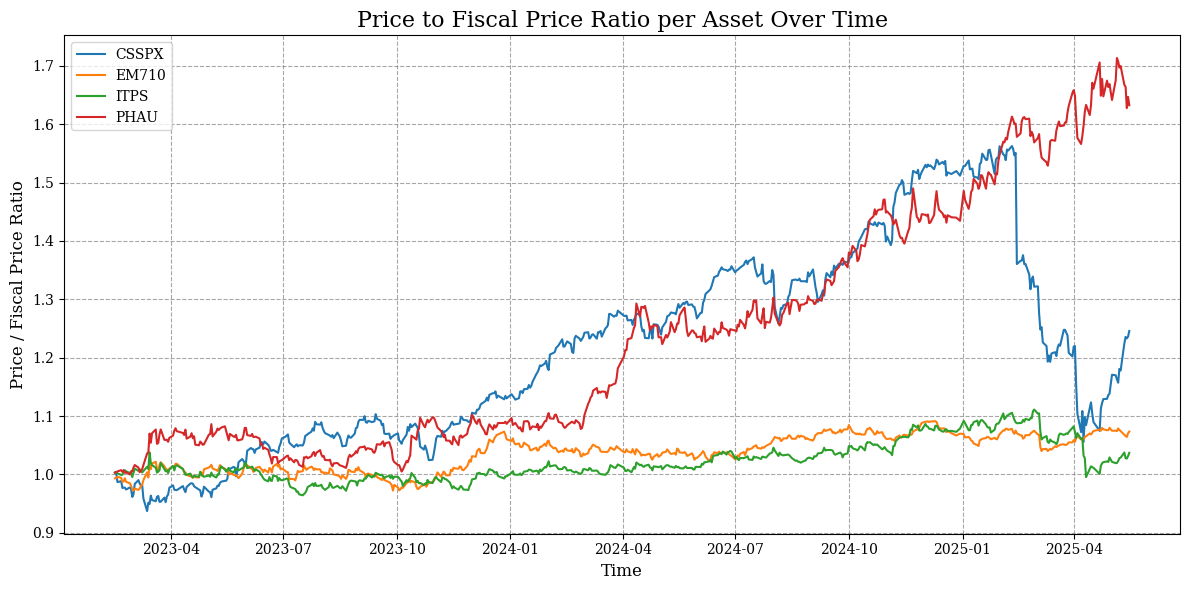

In [25]:
plot_timeseries(
    time_series_data=price_to_fiscal_price_ratio,
    columns_to_plot=price_to_fiscal_price_ratio.columns,
    title='Price to Fiscal Price Ratio per Asset Over Time',
    ylabel='Price / Fiscal Price Ratio',
    xlabel='Time',
    legend_loc='upper left'
    )

In [26]:
print('Returns (%) per Asset as of latest market data:',
      price_to_fiscal_price_ratio.iloc[-1].name.strftime('%Y-%m-%d'))
((price_to_fiscal_price_ratio.iloc[-1] - 1)*100).round(2)

Returns (%) per Asset as of latest market data: 2025-05-16


CSSPX    24.57
EM710     7.34
ITPS      3.70
PHAU     63.25
Name: 2025-05-16 00:00:00, dtype: float64

The plot above visualizes the evolution of the Price to Fiscal Price Ratio for each asset in the portfolio over time. The printed output shows the percentage return for each asset as of the latest market data.

Finally, I examine the **correlation between the returns** of the different assets in the portfolio. The correlation matrix helps to understand how the price movements of these assets relate to each other. Lower correlation between assets can contribute to better portfolio diversification.

In [27]:
# creating the asset close price DataFrame
asset_close_prices = []
for asset in assets.keys():
    asset_close_prices.append(assets[asset].Price)

asset_close_prices = pd.concat(asset_close_prices, axis=1)
asset_close_prices.columns = [asset for asset in assets.keys()]

In [28]:
asset_close_prices.pct_change().dropna().corr()

,CSSPX,EM710,ITPS,PHAU
CSSPX,1.000000,-0.015533,0.234670,0.025584
EM710,-0.015533,1.000000,0.426721,0.298575
ITPS,0.234670,0.426721,1.000000,0.280795
PHAU,0.025584,0.298575,0.280795,1.000000


The correlation matrix displayed above shows the pairwise correlation coefficients between the daily percentage changes of the closing prices of the assets in the portfolio. Values close to 1 indicate a strong positive correlation (assets tend to move in the same direction), values close to -1 indicate a strong negative correlation (assets tend to move in opposite directions), and values close to 0 indicate little to no correlation.

#### Summary

This notebook provided an example of how leveraging custom functions from the `utils.py` module to track and analyze the performance of a real investment portfolio.

-   Load and summarize portfolio transactions.
-   Perform portfolio accounting, determine the current asset allocation, and identify rebalancing needs.
-   Calculate key portfolio-level performance metrics, including total return, annualized return, annualized volatility, and Sharpe Ratio.
-   Visualize the portfolio's market value, profitability, and drawdowns over time.
-   Analyze the individual performance of each asset by examining the *Price to Fiscal-Price Ratio* and the asset correlation matrix.

The analysis revealed the portfolio's performance and risk characteristics up to the latest available market data. The individual asset performance analysis highlighted the contribution of each holding. This tracking exercise showed the utility of the developed tools for monitoring and understanding the dynamics of a real-world investment portfolio.